<b><h2>Tutorial: Recurrent neural network for sequence labelling </h2></b>


**Mounting Google Drive**

with the following command

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


In [2]:
cd drive/My Drive/Neuralnetworks4NLP/data

/content/drive/My Drive/TCS-Deep-Learning-Session-2020/data


**NER Dataset taken from** [Kaggle](https://www.kaggle.com/abhinavwalia95/entity-annotated-corpus)

In [0]:
import pandas as pd
import numpy as np

data = pd.read_csv("ner_dataset.csv", encoding="latin1")  ## Loading dataset

**Filling the Missing Entries**

In [0]:
data = data.fillna(method="ffill")

**Some Stats of dataset**

In [5]:
words= ["<PAD>"]
data_words = list(set(data["Word"].values))
words.extend(data_words)
n_words = len(words); 
print("No. of words:", n_words)

NEtags = list(set(data["Tag"].values))
n_tags = len(NEtags); n_tags
print("No. of tags:", n_tags)

No. of words: 35179
No. of tags: 17


In [0]:
words[:10]

['<PAD>',
 'supported',
 'Blake',
 'clouded',
 'Minh',
 'Sudi',
 'confrontations',
 'Saadi',
 'Bhutto',
 'Landmarks']

In [6]:
NEtags   # Tagsets

['B-nat',
 'B-geo',
 'B-art',
 'O',
 'I-tim',
 'B-org',
 'I-geo',
 'I-org',
 'B-per',
 'B-eve',
 'I-eve',
 'I-nat',
 'B-tim',
 'I-gpe',
 'B-gpe',
 'I-per',
 'I-art']

 
 ![alt text](https://d2ueix13hy5h3i.cloudfront.net/wp-content/uploads/2019/06/Capture1.png)


**Untility function for dataset**

In [0]:
class NERSentenceGetter(object):
    
    def __init__(self, data):
        self.n_sent = 1
        self.data = data
        self.empty = False
        agg_func = lambda s: [(w, p, t) for w, p, t in zip(s["Word"].values.tolist(),
                                                           s["POS"].values.tolist(),
                                                           s["Tag"].values.tolist())]
        self.grouped = self.data.groupby("Sentence #").apply(agg_func)
        self.sentences = [s for s in self.grouped]
    
    def get_next_sentence(self):
        try:
            s = self.grouped["Sentence: {}".format(self.n_sent)]
            self.n_sent += 1
            return s
        except:
            return None

In [0]:
NERgetter = NERSentenceGetter(data)

In [0]:
sent = NERgetter.get_next_sentence()

In [10]:
sent

[('Thousands', 'NNS', 'O'),
 ('of', 'IN', 'O'),
 ('demonstrators', 'NNS', 'O'),
 ('have', 'VBP', 'O'),
 ('marched', 'VBN', 'O'),
 ('through', 'IN', 'O'),
 ('London', 'NNP', 'B-geo'),
 ('to', 'TO', 'O'),
 ('protest', 'VB', 'O'),
 ('the', 'DT', 'O'),
 ('war', 'NN', 'O'),
 ('in', 'IN', 'O'),
 ('Iraq', 'NNP', 'B-geo'),
 ('and', 'CC', 'O'),
 ('demand', 'VB', 'O'),
 ('the', 'DT', 'O'),
 ('withdrawal', 'NN', 'O'),
 ('of', 'IN', 'O'),
 ('British', 'JJ', 'B-gpe'),
 ('troops', 'NNS', 'O'),
 ('from', 'IN', 'O'),
 ('that', 'DT', 'O'),
 ('country', 'NN', 'O'),
 ('.', '.', 'O')]

In [0]:
sentences = NERgetter.sentences

In [12]:
len(sentences)

47959

In [0]:
max_len = 100
word2idx = {w: i for i, w in enumerate(words)}     ## mapping word 2 indices
tag2idx = {t: i for i, t in enumerate(NEtags)}     ## mapping tag 2 indices


In [14]:
len(word2idx)

35179

In [15]:
from keras.preprocessing.sequence import pad_sequences
X = [[word2idx[w[0]] for w in s] for s in sentences]

X = pad_sequences(maxlen=max_len, sequences=X, padding="post", value=0)  ## Padding sentences with max length

Using TensorFlow backend.


In [16]:
X[1]

array([ 8944, 25947,  1368,  1633,  8062,   113,  4880, 21781,   113,
        3540, 18184,  8667,  8642, 30888, 23737, 22857, 28896,  4934,
       29337, 20340, 15977,  6286, 30798, 33746,  9763,     0,     0,
           0,     0,     0,     0,     0,     0,     0,     0,     0,
           0,     0,     0,     0,     0,     0,     0,     0,     0,
           0,     0,     0,     0,     0,     0,     0,     0,     0,
           0,     0,     0,     0,     0,     0,     0,     0,     0,
           0,     0,     0,     0,     0,     0,     0,     0,     0,
           0,     0,     0,     0,     0,     0,     0,     0,     0,
           0,     0,     0,     0,     0,     0,     0,     0,     0,
           0,     0,     0,     0,     0,     0,     0,     0,     0,
           0], dtype=int32)

In [0]:
y = [[tag2idx[w[2]] for w in s] for s in sentences]

In [18]:
y[0]

[3, 3, 3, 3, 3, 3, 1, 3, 3, 3, 3, 3, 1, 3, 3, 3, 3, 3, 14, 3, 3, 3, 3, 3]

In [0]:
y = pad_sequences(maxlen=max_len, sequences=y, padding="post", value=tag2idx["O"])   ## Padding tags with max length

In [0]:
from keras.utils.np_utils import to_categorical

In [21]:
y[0]

array([ 3,  3,  3,  3,  3,  3,  1,  3,  3,  3,  3,  3,  1,  3,  3,  3,  3,
        3, 14,  3,  3,  3,  3,  3,  3,  3,  3,  3,  3,  3,  3,  3,  3,  3,
        3,  3,  3,  3,  3,  3,  3,  3,  3,  3,  3,  3,  3,  3,  3,  3,  3,
        3,  3,  3,  3,  3,  3,  3,  3,  3,  3,  3,  3,  3,  3,  3,  3,  3,
        3,  3,  3,  3,  3,  3,  3,  3,  3,  3,  3,  3,  3,  3,  3,  3,  3,
        3,  3,  3,  3,  3,  3,  3,  3,  3,  3,  3,  3,  3,  3,  3],
      dtype=int32)

In [0]:
y = [to_categorical(np.asarray(i), n_tags) for i in y]   ## one hot vector transformation for each tag

In [23]:
y[0]

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]], dtype=float32)

In [0]:
len(y[0][0])

17

In [0]:
from sklearn.model_selection import train_test_split
x_train, x_val, y_train, y_val = train_test_split(X, y, test_size=0.1)   ## Splitting the datasets

**Utility functions for Word Embedding**

In [0]:
import os
import csv
import numpy as np
from numpy.random import RandomState
prng = RandomState(1234567890)



EMBEDDING_DIM = 50
GLOVE_FILE = 'glove.6B.50d.txt'

def get_embeddings():
    embeddings = {}
    with open(os.path.join(GLOVE_FILE), 'r') as f:
        for line in f:
            values = line.split()
            word = values[0]
            coefs = np.asarray(values[1:], dtype='float32')
            embeddings[word] = coefs
    return embeddings

def make_embedding_layer(word_index):
    embeddings = get_embeddings()
    nb_words = max(n_words, len(word_index))
    embedding_matrix = np.zeros((nb_words, EMBEDDING_DIM))

    for word, i in word_index.items():
        if i >= n_words:
            continue
        embedding_vector = embeddings.get(word)
        if embedding_vector is not None:
            embedding_matrix[i] = embedding_vector

    embedding_layer = Embedding(nb_words, EMBEDDING_DIM, weights=[embedding_matrix], input_length=max_len, trainable=False)
    return embedding_layer

**Keras library**

In [0]:
from keras.models import Sequential, Model
from keras.layers import Dropout
from keras.preprocessing.text import Tokenizer
from keras.preprocessing.sequence import pad_sequences
from keras.utils.np_utils import to_categorical
from keras.layers import Dense, Input,  Flatten, merge
from keras.layers import Conv1D, MaxPooling1D, AveragePooling1D, Embedding, LSTM, GRU, SimpleRNN
from keras.layers import TimeDistributed, Bidirectional


**Building Model**

In [0]:
embedded_sequences = make_embedding_layer(word2idx)


# ##### With random embedding + Bi-Directional LSTM #######
model = Sequential([
        Embedding(n_words, 25, input_length=max_len),
        Bidirectional(LSTM(100, return_sequences=True)),
        TimeDistributed(Dense(n_tags, activation="softmax"))
    ])

# ###### With Glove Embedding + Bi-Directional LSTM  #####
# model = Sequential([
#         embedded_sequences,
#         Bidirectional(LSTM(100, return_sequences=True)),
#         TimeDistributed(Dense(n_tags, activation="softmax"))
#     ])

#### With Glove Embedding + CNN ######
# model = Sequential([
#         embedded_sequences,
#         Conv1D(filters=64,
#                          kernel_size=3,
#                          padding="same",
#                          activation="relu",
#                          strides=1),
#         TimeDistributed(Dense(n_tags, activation="softmax"))
#     ])

model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['acc'])  


In [28]:
print(model.summary())

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_2 (Embedding)      (None, 100, 25)           879475    
_________________________________________________________________
bidirectional_1 (Bidirection (None, 100, 200)          100800    
_________________________________________________________________
time_distributed_1 (TimeDist (None, 100, 17)           3417      
Total params: 983,692
Trainable params: 983,692
Non-trainable params: 0
_________________________________________________________________
None


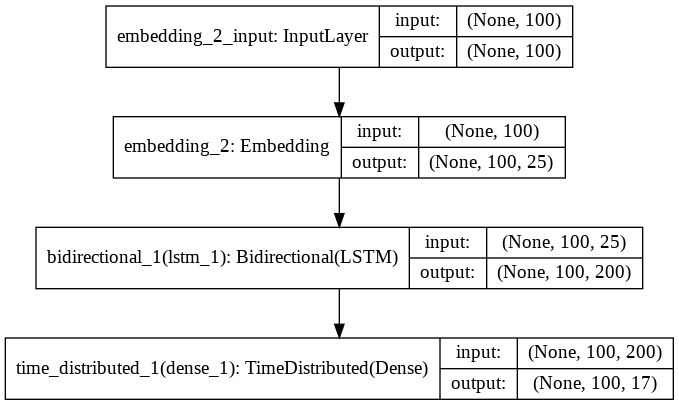

In [29]:
from keras.utils.vis_utils import plot_model
plot_model(model, to_file='model_plot.png', show_shapes=True, show_layer_names=True)

**Functions to train and evaluate the model**

In [0]:
from keras.callbacks import ModelCheckpoint
from sklearn.metrics import classification_report




def train(model, x_train, x_val, y_train, y_val, network):
    print("Training "+ network)
    cb = [ModelCheckpoint("weights_"+network+".h5", save_best_only=True, save_weights_only=False)]
    history = model.fit(x_train, np.array(y_train), validation_data=(x_val, np.array(y_val)), nb_epoch=3, verbose=1, batch_size=256, callbacks=cb)
    try:
        os.remove("model_"+network+".h5")
    except OSError:
        pass
    model.save("model_"+network+".h5")
    return history

  

def evaluate(expected_out, predicted_out):
    expected_categories = [np.argmax(x,axis=-1) for x in expected_out]
    predicted_categories = [np.argmax(x,axis=-1) for x in predicted_out]
    gold=[]
    for tags in expected_categories:
        for tag in tags:
            gold.append(NEtags[tag])
    predicted=[]
    for tags in predicted_categories:
        for tag in tags:
            predicted.append(NEtags[tag])
    #cm = confusion_matrix(expected_categories, predicted_categories)
    report = classification_report(y_pred=predicted, y_true=gold)
    print(report)




In [0]:
import matplotlib.pyplot as plt
plt.style.use('ggplot')

def plot_history(history):
    acc = history.history['acc']
    val_acc = history.history['val_acc']
    loss = history.history['loss']
    val_loss = history.history['val_loss']
    x = range(1, len(acc) + 1)

    plt.figure(figsize=(12, 5))
    plt.subplot(1, 2, 1)
    plt.plot(x, acc, 'b', label='Training acc')
    plt.plot(x, val_acc, 'r', label='Validation acc')
    plt.title('Training and validation accuracy')
    plt.legend()
    plt.subplot(1, 2, 2)
    plt.plot(x, loss, 'b', label='Training loss')
    plt.plot(x, val_loss, 'r', label='Validation loss')
    plt.title('Training and validation loss')
    plt.legend()

Training RNN-NER


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:10: UserWarning: The `nb_epoch` argument in `fit` has been renamed `epochs`.
  # Remove the CWD from sys.path while we load stuff.
/usr/local/lib/python3.6/dist-packages/tensorflow/python/framework/indexed_slices.py:434: UserWarning: Converting sparse IndexedSlices to a dense Tensor of unknown shape. This may consume a large amount of memory.
  "Converting sparse IndexedSlices to a dense Tensor of unknown shape. "


Train on 43163 samples, validate on 4796 samples
Epoch 1/3
43163/43163 [==============================] - 86s 2ms/step - loss: 0.3332 - acc: 0.9651 - val_loss: 0.1562 - val_acc: 0.9669
Epoch 2/3
43163/43163 [==============================] - 84s 2ms/step - loss: 0.1241 - acc: 0.9681 - val_loss: 0.0908 - val_acc: 0.9734
Epoch 3/3
43163/43163 [==============================] - 84s 2ms/step - loss: 0.0791 - acc: 0.9756 - val_loss: 0.0703 - val_acc: 0.9775


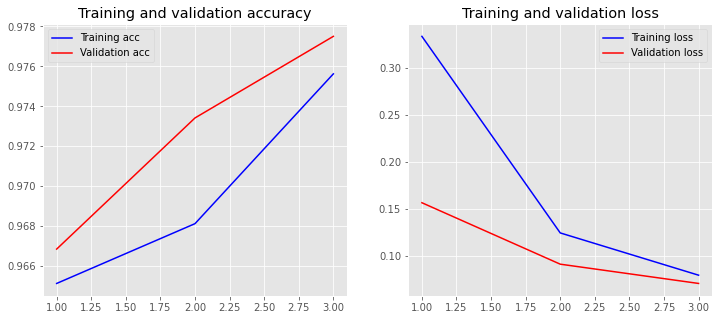

In [32]:
history = train(model, x_train, x_val, y_train, y_val,"RNN-NER")   ### Training the model
plot_history(history)     ## Plot learning curve


**Performance on Validation set**

In [0]:
valid_predicted_out = model.predict(x=x_val, batch_size=256)

evaluate(y_val, valid_predicted_out)

/usr/local/lib/python3.6/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


              precision    recall  f1-score   support

       B-art       0.00      0.00      0.00        35
       B-eve       0.00      0.00      0.00        30
       B-geo       0.39      0.82      0.53      3818
       B-gpe       0.00      0.00      0.00      1588
       B-nat       0.00      0.00      0.00        27
       B-org       0.41      0.09      0.15      1986
       B-per       0.41      0.34      0.37      1670
       B-tim       0.70      0.02      0.03      2024
       I-art       0.00      0.00      0.00        32
       I-eve       0.00      0.00      0.00        26
       I-geo       0.56      0.04      0.08       786
       I-gpe       0.00      0.00      0.00        27
       I-nat       0.00      0.00      0.00         7
       I-org       0.34      0.26      0.29      1735
       I-per       0.51      0.56      0.54      1733
       I-tim       0.00      0.00      0.00       649
           O       0.99      1.00      1.00    463427

    accuracy              

**Test on unseet example**

In [0]:
i = 101
p = model.predict(np.array(x_val[[i]]))
p = np.argmax(p, axis=-1)
true = np.argmax(y_val[i], -1)
print("{:15}{:5}{}".format("Word", "True", "Pred"))
print(30 * "=")
for w, t, pred in zip(x_val[i], true, p[0]):
    if w != 0:
        print("{:15}: {:5} {}".format(words[w-1], NEtags[t], NEtags[pred]))

Word           True Pred
Data           : O     O
inviting       : O     O
revitalized    : O     O
Ezzedin        : O     O
Clearwater     : O     O
redrawing      : O     O
Velasco        : B-tim B-geo
formality      : O     O
Dairy          : B-geo O
intimidation   : O     O
Sirte          : B-geo B-geo
using          : B-per I-org
appearances    : I-per I-org
Mannar         : O     O
traumatic      : O     O
Progressive    : O     O
intimidation   : O     O
Smoky          : O     O
Alex           : O     O
Domino         : O     O
predominate    : O     O
offenses       : O     O
Mannar         : O     O
Mota           : B-geo B-geo
Mannar         : O     O
Awan           : O     O
Yves           : O     O
Guinea         : O     O
Mannar         : O     O
Lendu          : O     O
Corporate      : O     O
KONARE         : O     O
Guerrilla      : O     O
al-Dulaimi     : O     O
governorates   : O     O
Nadhem         : O     O
